In [52]:
import re
import nltk
import string
import unicodedata
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import sentiment
from nltk import word_tokenize
from wordcloud import WordCloud
from pandas_profiling import ProfileReport
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [6]:
data = pd.read_csv("data.csv",  encoding='utf8', low_memory=False )

In [7]:
data.shape

(4410, 12)

In [8]:
data.head()

_id  \
0  corteconstitucional_T-017/12   
1  corteconstitucional_T-016/12   
2  corteconstitucional_T-014/12   
3  corteconstitucional_T-015/12   
4  corteconstitucional_T-012/11   

                                          collective  \
0  [{"text": "república", "label": "MISC", "qty":...   
1   {"entity": {"$oid": "5fa43ed05821d000db7b8649"}}   
2   {"entity": {"$oid": "5fa43ed25821d000db7b885b"}}   
3   {"entity": {"$oid": "5fa43ed45821d000db7b8b3b"}}   
4   {"entity": {"$oid": "5fa43ed65821d000db7b8c9d"}}   

                       date    file_id  \
0  2012-01-20T00:00:00.000Z  T-3140852   
1  2012-01-20T00:00:00.000Z  T-3183107   
2  2012-01-20T00:00:00.000Z  T-3187308   
3  2012-01-20T00:00:00.000Z  T-3182540   
4  2011-01-14T00:00:00.000Z  T-2719663   

                                          judicature  \
0  [{"name": "MARÍA VICTORIA CALLE CORREA", "rol"...   
1  [{"name": "MARÍA VICTORIA CALLE CORREA", "rol"...   
2  [{"name": "JUAN CARLOS HENAO PÉREZ", "rol": "P...   
3  [{"name": "MARÍA VICTORIA CALLE CORREA", "rol"...   
4  [{"name": "MARÍA VICTORIA CALLE CORREA", "rol"...   

                                        participants report_receipt_at  \
0  [{"name": "ANA JULIA GARZON GUERRERO", "role":...        2012-08-08   
1  [{"name": "MARIA YOLANDA MONTOYA BENITEZ", "ro...        2012-05-18   
2  [{"name": "HECTOR FABIO RODRIGUEZ VENEGAS REPR...        2013-05-07   
3  [{"name": "LUZ MIRIAM HIGUITA DE CANTOR", "rol...        2012-05-18   
4  [{"name": "MARIA DEL CARMEN ZABALA LOPEZ", "ro...        2011-05-10   

  sentence_id                                               text  \
0    T-017/12  REPÚBLICA DE COLOMBIA\n\n\nSentencia T-017/12\...   
1    T-016/12  REPÚBLICA DE COLOMBIA\n\n\nSentencia\r\nT-016/...   
2    T-014/12  REPÚBLICA DE COLOMBIA\n\n\nSentencia\r\nT-014/...   
3    T-015/12  REPÚBLICA DE COLOMBIA\n\n\nSentencia T-015/12\...   
4    T-012/11  REPÚBLICA DE COLOMBIA\n\n\nSentencia T-012/11\...   

                                               topic  \
0  Estabilidad laboral reforzada, debido proceso,...   
1  Debido proceso.  Tutela contra providencia jud...   
2  Mínimo vital, seguridad social.  A través de l...   
3  Debido proceso. Tutela contra providencia judi...   
4  Petición, dignidad humana, salud en conexidad ...   

                                                 url  \
0  https://www.corteconstitucional.gov.co/relator...   
1  https://www.corteconstitucional.gov.co/relator...   
2  https://www.corteconstitucional.gov.co/relator...   
3  https://www.corteconstitucional.gov.co/relator...   
4  https://www.corteconstitucional.gov.co/relator...   

                                          vocabulary  
0  [{"text": "república", "qty": 3}, {"text": "co...  
1  [{"text": "república", "qty": 3}, {"text": "co...  
2  [{"text": "república", "qty": 3}, {"text": "co...  
3  [{"text": "república", "qty": 3}, {"text": "co...  
4  [{"text": "república", "qty": 3}, {"text": "co...

In [9]:
data.iloc[1]

_id                                       corteconstitucional_T-016/12
collective            {"entity": {"$oid": "5fa43ed05821d000db7b8649"}}
date                                          2012-01-20T00:00:00.000Z
file_id                                                      T-3183107
judicature           [{"name": "MARÍA VICTORIA CALLE CORREA", "rol"...
participants         [{"name": "MARIA YOLANDA MONTOYA BENITEZ", "ro...
report_receipt_at                                           2012-05-18
sentence_id                                                   T-016/12
text                 REPÚBLICA DE COLOMBIA\n\n\nSentencia\r\nT-016/...
topic                Debido proceso.  Tutela contra providencia jud...
url                  https://www.corteconstitucional.gov.co/relator...
vocabulary           [{"text": "república", "qty": 3}, {"text": "co...
Name: 1, dtype: object

In [10]:
data.head(1)

_id  \
0  corteconstitucional_T-017/12   

                                          collective  \
0  [{"text": "república", "label": "MISC", "qty":...   

                       date    file_id  \
0  2012-01-20T00:00:00.000Z  T-3140852   

                                          judicature  \
0  [{"name": "MARÍA VICTORIA CALLE CORREA", "rol"...   

                                        participants report_receipt_at  \
0  [{"name": "ANA JULIA GARZON GUERRERO", "role":...        2012-08-08   

  sentence_id                                               text  \
0    T-017/12  REPÚBLICA DE COLOMBIA\n\n\nSentencia T-017/12\...   

                                               topic  \
0  Estabilidad laboral reforzada, debido proceso,...   

                                                 url  \
0  https://www.corteconstitucional.gov.co/relator...   

                                          vocabulary  
0  [{"text": "república", "qty": 3}, {"text": "co...

In [11]:
data = data.drop(["judicature", "participants", "collective", "_id", "topic", "url", "vocabulary", "date"], axis=1)

In [12]:
data.head()

file_id report_receipt_at sentence_id  \
0  T-3140852        2012-08-08    T-017/12   
1  T-3183107        2012-05-18    T-016/12   
2  T-3187308        2013-05-07    T-014/12   
3  T-3182540        2012-05-18    T-015/12   
4  T-2719663        2011-05-10    T-012/11   

                                                text  
0  REPÚBLICA DE COLOMBIA\n\n\nSentencia T-017/12\...  
1  REPÚBLICA DE COLOMBIA\n\n\nSentencia\r\nT-016/...  
2  REPÚBLICA DE COLOMBIA\n\n\nSentencia\r\nT-014/...  
3  REPÚBLICA DE COLOMBIA\n\n\nSentencia T-015/12\...  
4  REPÚBLICA DE COLOMBIA\n\n\nSentencia T-012/11\...

In [13]:
data.head(1)

file_id report_receipt_at sentence_id  \
0  T-3140852        2012-08-08    T-017/12   

                                                text  
0  REPÚBLICA DE COLOMBIA\n\n\nSentencia T-017/12\...

In [14]:
data["text"] = data["text"].str.lower()

In [15]:
len(data["text"])

4410

In [16]:
data

file_id report_receipt_at sentence_id  \
0                 T-3140852        2012-08-08    T-017/12   
1                 T-3183107        2012-05-18    T-016/12   
2                 T-3187308        2013-05-07    T-014/12   
3                 T-3182540        2012-05-18    T-015/12   
4                 T-2719663        2011-05-10    T-012/11   
...                     ...               ...         ...   
4405              T-6403234        2019-04-08   A. 177/19   
4406              T-6945381        2019-05-27  A. 177A/19   
4407  T-7064392 Y T-7073283        2019-04-08   SU.139/19   
4408              T-7071794        2019-07-08  A. 175A/19   
4409              T-6843600        2019-03-21   A. 121/19   

                                                   text  
0     república de colombia\n\n\nsentencia t-017/12\...  
1     república de colombia\n\n\nsentencia\r\nt-016/...  
2     república de colombia\n\n\nsentencia\r\nt-014/...  
3     república de colombia\n\n\nsentencia t-015/12\...  
4     república de colombia\n\n\nsentencia t-012/11\...  
...                                                 ...  
4405  auto 177/19\n \nreferencia:\r\nexpediente t-64...  
4406  auto\r\n177a/19\n \n \nreferencia:\r\nexpedien...  
4407  sentencia\r\nsu139/19 \n \naccion de tutela co...  
4408  auto 175a/19\n \n \nreferencia: expediente t-7...  
4409  auto\r\n121/19\n \n \nreferencia: expediente t...  

[4410 rows x 4 columns]

## Query to filter Mongo database

```json

db.judgemnts.aggregate( [
   {$count: "myCount"},
   {$match: { "file_id": /^T/i }}
])


db.judgemnts.aggregate( [
   {$match: { "file_id": /^T/i }}
])

db.judgemnts.count({ "file_id": /^T/i })

db.judgemnts.find({ "file_id": /^T/i })


db.judgemnts.aggregate( [
   {
        $group: {
            "file_id": /^T/i,
             count: { $sum: 1 }
        }
   }
])


db.judgemnts.aggregate( [
   {
        $group: {
           _id: "$file_id",
           judgemnts: { $push: "$date" }
        }
   }
])


db.judgemnts.aggregate( [

   {
         $match: { "file_id": /^T/i }
   },
   {
        $group: {
           _id: "$file_id",
           count: { $sum: 1 }
        }
   }
])

```

In [18]:
new_data = pd.DataFrame([], columns = ['file_id', 'antecedentes' , 'decision'])

In [19]:
new_data

Empty DataFrame
Columns: [file_id, antecedentes, decision]
Index: []

In [27]:
def quitar_tildes(cadena):
    s = ''.join((c for c in unicodedata.normalize('NFD',cadena) if unicodedata.category(c) != 'Mn'))
    return s

In [28]:
def get_segment(data):
    lista_df = []
    for index, row in data.iterrows():
        texto = re.split(
            r'[\n]+[(^i|^v|)]+\.\s{0,}[(\w)]{0,}?', 
            quitar_tildes(row["text"])
        )
        if len(texto) > 4:
            lista_df.append({"file_id": row["file_id"] , "antecedentes": texto[1], "decision": texto[4]})

    return lista_df

In [29]:
new_data = pd.DataFrame(get_segment(data), columns = ["file_id", 'antecedentes' , 'decision'])

In [30]:
new_data

file_id                                       antecedentes  \
0               T-3187308  antecedentes\n \n1. hechos\n \n1. el 27 de jul...   
1               T-2719663  antecedentes\n \n1.    hechos\n \nel defensor ...   
2               T-3176539  antecedentes\n \nel ocho (8) de junio de dos m...   
3               T-3180007  antecedentes\n \nel senor juan antonio, a trav...   
4     T-2764991 Y 2822307  antecedentes\n \n1. hechos\n \nlos hechos rela...   
...                   ...                                                ...   
1857            T-7128811  antecedentes\n \n1. hechos\n \n\n1.1 la senora...   
1858            T-6960341  antecedentes \n \n1. hechos y relato contenido...   
1859            T-7147012  antecedentes\n \nherley\r\nramirez alzate pres...   
1860            T-7103649  antecedentes\n \na. hechos y pretensiones\n \n...   
1861            T-6882209  antecedentes\n \n1.     hechos relevantes\n \n...   

                                               decision  
0     decision\n \ncon\r\nfundamento en las consider...  
1     decision\n \nen merito de lo expuesto, la\r\ns...  
2     decision\n \nen merito de lo expuesto, la sala...  
3     consideraciones de la corte constitucional\n \...  
4     decision \n \nen merito de lo expuesto, la sal...  
...                                                 ...  
1857  que no esten\r\nexpresamente incluidos en el p...  
1858  pruebas decretadas en sede de revision \n \nel...  
1859  existencia\r\nde un peligro especifico e indiv...  
1860  decision\n \nen merito de lo expuesto, la sala...  
1861  sintesis\n \nen el presente caso, correspondio...  

[1862 rows x 3 columns]

In [43]:
def quitar_espacios(text):
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\r', ' ', text)
    text = re.sub('\xa0', ' ', text)

    return text

new_data["decision"] = new_data.decision.apply(lambda x: quitar_espacios(x))
new_data["antecedentes"] = new_data.antecedentes.apply(lambda x: quitar_espacios(x))

In [44]:
def quita_signos(text):
    puntuacion = string.punctuation
    for item in puntuacion:
        text = text.replace(item, "")
    return text

new_data["decision"] = pd.DataFrame(new_data.decision.apply(lambda x: quita_signos(x)))
new_data["antecedentes"] = pd.DataFrame(new_data.antecedentes.apply(lambda x: quita_signos(x)))


In [45]:
new_data[200:300]

file_id  \
200                     T-3418301   
201                     T-3421893   
202                     T-2448215   
203                     T-3046479   
204  T-3015372 Y OTROS ACUMULADOS   
..                            ...   
295                     T-2913197   
296                     T-2862165   
297                     T-2970924   
298                      T-868-11   
299                      T-696-10   

                                          antecedentes  \
200  antecedentes    el ciudadano accionante quien ...   
201  antecedentes   el  pasado mes de diciembre de ...   
202  antecedentes   1 hechos    11 el ciudadano rei...   
203  antecedentes   el senor lizardo  antonio holgu...   
204  antecedentes   1                 fundamentos d...   
..                                                 ...   
295  antecedentes   el dia 19 de agosto de 2010 el ...   
296  antecedentes   el senor luis  anibal cardona n...   
297  antecedentes   dellanira  caballero nare insta...   
298  antecedentes   mediante  memorial  recibido en...   
299  antecedentes   1 mediante providencia t696 de ...   

                                              decision  
200  consideraciones y fundamentos    competencia  ...  
201   se aprecia que la jurisprudencia ha sido radi...  
202  consideraciones y fundamentos   1 competencia ...  
203   decision   en merito de lo expuesto la sala s...  
204  antecedentes   1 en la sentencia t613 de 2011 ...  
..                                                 ...  
295  consideraciones y fundamentos   1 competencia ...  
296    paragrafo 3o se considera justa causa para d...  
297   decision   en merito de  lo expuesto la sala ...  
298  decision   con fundamento  en las consideracio...  
299  decision    en merito de  lo expuesto la corte...  

[100 rows x 3 columns]

In [46]:
vectorizado = CountVectorizer(stop_words=stopwords.words("spanish"))
data_vectorizado= vectorizado.fit_transform(new_data.decision)
data_result = pd.DataFrame(data_vectorizado.toarray(), columns=vectorizado.get_feature_names())
data_result.index = new_data.index

In [47]:
data_result.head()

00  000  000000  00000210  00000422  000011310  0000147305  000017  00002  \
0   0    0       0         0         0          0           0       0      0   
1   0    0       0         0         0          0           0       0      0   
2   0    0       0         0         0          0           0       0      0   
3   0    0       0         0         0          0           0       0      0   
4   0    0       0         0         0          0           0       0      0   

   000022  ...  zuly  zumbido  zume  zumith  zuniga  zuniga105  zunilda  \
0       0  ...     0        0     0       0       0          0        0   
1       0  ...     0        0     0       0       0          0        0   
2       0  ...     0        0     0       0       0          0        0   
3       0  ...     0        0     0       0       0          0        0   
4       0  ...     0        0     0       0       0          0        0   

   zurita  zvtn  ºsentencia  
0       0     0           0  
1       0     0           0  
2       0     0           0  
3       0     0           0  
4       0     0           0  

[5 rows x 83440 columns]

In [48]:
data_result = data_result.transpose()
data_result.head()

0     1     2     3     4     5     6     7     8     9     ...  \
00           0     0     0     0     0     0     0     0     0     0  ...   
000          0     0     0     0     0     0     0     0     0     0  ...   
000000       0     0     0     0     0     0     0     0     0     0  ...   
00000210     0     0     0     0     0     0     0     0     0     0  ...   
00000422     0     0     0     0     0     0     0     0     0     0  ...   

          1852  1853  1854  1855  1856  1857  1858  1859  1860  1861  
00           0     0     0     0     0     0     0     0     0     0  
000          0     0     0     0     0     0     0     0     0     0  
000000       0     0     0     0     0     0     0     0     0     0  
00000210     0     0     0     0     0     0     0     0     0     0  
00000422     0     0     0     0     0     0     0     0     0     0  

[5 rows x 1862 columns]

## Top of words by Tutela

In [49]:
top_dict = {}
for item in data_result.columns:
    top = data_result[item].sort_values(ascending=False).head(30)
    top_dict[item]= list(zip(top.index, top.values))
print(top_dict)

{0: [('tutela', 8), ('derechos', 8), ('fundamentales', 7), ('accion', 7), ('sentencia', 7), ('articulo', 6), ('rodriguez', 5), ('constitucional', 5), ('venegas', 5), ('perjuicio', 4), ('senor', 4), ('hector', 4), ('medios', 4), ('constitucion', 4), ('fabio', 4), ('derecho', 4), ('defensa', 4), ('irremediable', 4), ('existencia', 3), ('asi', 3), ('procedera', 3), ('corte', 3), ('manera', 3), ('15', 3), ('magistrado', 3), ('amparo', 3), ('politica', 3), ('judiciales', 3), ('nacional', 3), ('mecanismo', 3)], 1: [('salud', 17), ('mp', 13), ('cuaderno', 12), ('maria', 10), ('expediente', 10), ('corte', 10), ('sentencia', 10), ('constitucional', 9), ('carmen', 8), ('senora', 8), ('zabala', 8), ('t2719663', 8), ('tutelante', 8), ('lopez', 7), ('folio', 7), ('revision', 6), ('2010', 6), ('primera', 6), ('servicios', 6), ('tutela', 6), ('convida', 5), ('caso', 5), ('folios', 5), ('derecho', 5), ('medico', 5), ('accion', 5), ('riesgo', 5), ('epss', 5), ('medicamento', 5), ('19', 5)], 2: [('artic

## Most Popular words by Tutela

In [72]:
def nube_de_palabras(columna):
    wc = WordCloud(
        stopwords=stopwords.words("spanish"), 
        background_color="white", 
        colormap="Dark2",
        max_font_size=180, 
        random_state=42
    )


    plt.rcParams['figure.figsize'] = [16,12]
    count_graph = 0
    for index, row in new_data.iterrows():
        count_graph = index+1
        wc.generate(new_data[columna][index])
        plt.subplot(8, 8, count_graph)
        plt.imshow(wc, interpolation="bilinear")
        plt.axis("off")
        plt.title('File_ID')
        if count_graph == 64:
            break
    plt.show()

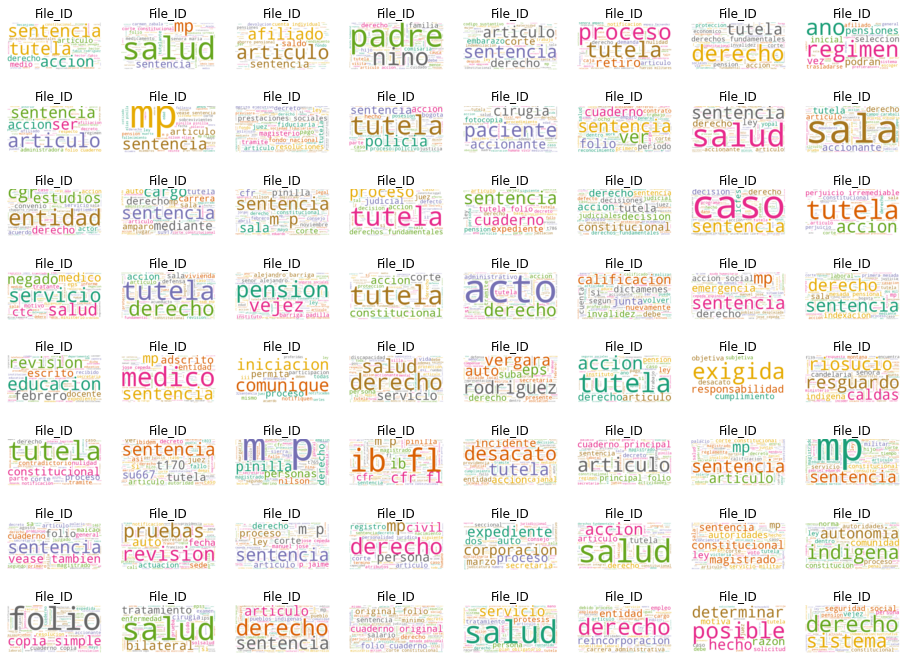

In [73]:
nube_de_palabras('decision')

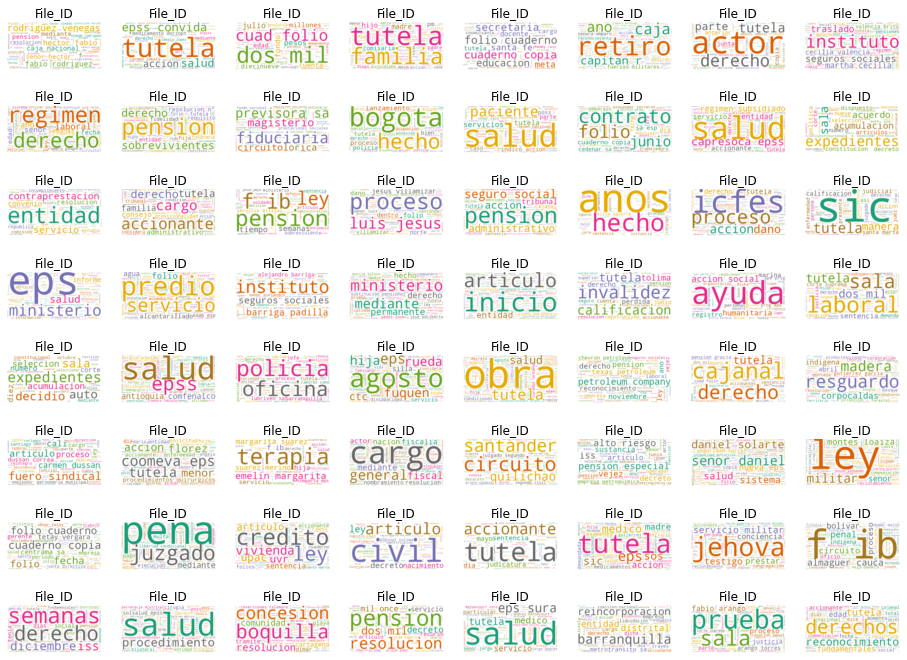

In [74]:
nube_de_palabras('antecedentes')

In [75]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/oscfrayle/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [76]:
analizador = SentimentIntensityAnalyzer()
analizador.polarity_scores("hiooasdmasasd sdfsdfsd")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

## polarity scores by Tutela

In [77]:
def sentimientos(new_data, columna):
    sentimientos_list = []
    for index, row in new_data.iterrows():
        scores = analizador.polarity_scores(row[columna])
        sentimientos_list.append({
            f"{columna}_negative": scores['neg'], 
            f"{columna}_neutral": scores['neu'], 
            f'{columna}_positivo': scores['pos'], 
        })
    return pd.DataFrame(sentimientos_list)


In [78]:
new_data.head()

file_id                                       antecedentes  \
0            T-3187308  antecedentes   1 hechos   1 el 27 de julio de ...   
1            T-2719663  antecedentes   1    hechos   el defensor del p...   
2            T-3176539  antecedentes   el ocho 8 de junio de dos mil  ...   
3            T-3180007  antecedentes   el senor juan antonio a traves ...   
4  T-2764991 Y 2822307  antecedentes   1 hechos   los hechos relatados...   

                                            decision  
0  decision   con  fundamento en las consideracio...  
1  decision   en merito de lo expuesto la  sala p...  
2  decision   en merito de lo expuesto la sala te...  
3  consideraciones de la corte constitucional   1...  
4  decision    en merito de lo expuesto la sala n...

In [79]:
df_decision_sentimientos = sentimientos(new_data, 'decision')

In [80]:
df_antecedentes_sentimientos = sentimientos(new_data, 'antecedentes')

In [81]:
df_result_sentimientos = pd.concat([new_data, df_decision_sentimientos, df_antecedentes_sentimientos], axis=1, join="inner")

In [95]:
df_result_sentimientos.shape

(1862, 9)

## New Dataframe with additional variables

In [83]:
df_result_sentimientos.head()

file_id                                       antecedentes  \
0            T-3187308  antecedentes   1 hechos   1 el 27 de julio de ...   
1            T-2719663  antecedentes   1    hechos   el defensor del p...   
2            T-3176539  antecedentes   el ocho 8 de junio de dos mil  ...   
3            T-3180007  antecedentes   el senor juan antonio a traves ...   
4  T-2764991 Y 2822307  antecedentes   1 hechos   los hechos relatados...   

                                            decision  decision_negative  \
0  decision   con  fundamento en las consideracio...              0.019   
1  decision   en merito de lo expuesto la  sala p...              0.015   
2  decision   en merito de lo expuesto la sala te...              0.027   
3  consideraciones de la corte constitucional   1...              0.025   
4  decision    en merito de lo expuesto la sala n...              0.027   

   decision_neutral  decision_positivo  antecedentes_negative  \
0             0.977              0.004                  0.009   
1             0.981              0.004                  0.029   
2             0.968              0.005                  0.028   
3             0.955              0.020                  0.023   
4             0.959              0.014                  0.018   

   antecedentes_neutral  antecedentes_positivo  
0                 0.979                  0.012  
1                 0.964                  0.007  
2                 0.952                  0.020  
3                 0.965                  0.012  
4                 0.976                  0.006

In [87]:
new_data.head()

file_id                                       antecedentes  \
0            T-3187308  antecedentes   1 hechos   1 el 27 de julio de ...   
1            T-2719663  antecedentes   1    hechos   el defensor del p...   
2            T-3176539  antecedentes   el ocho 8 de junio de dos mil  ...   
3            T-3180007  antecedentes   el senor juan antonio a traves ...   
4  T-2764991 Y 2822307  antecedentes   1 hechos   los hechos relatados...   

                                            decision  
0  decision   con  fundamento en las consideracio...  
1  decision   en merito de lo expuesto la  sala p...  
2  decision   en merito de lo expuesto la sala te...  
3  consideraciones de la corte constitucional   1...  
4  decision    en merito de lo expuesto la sala n...

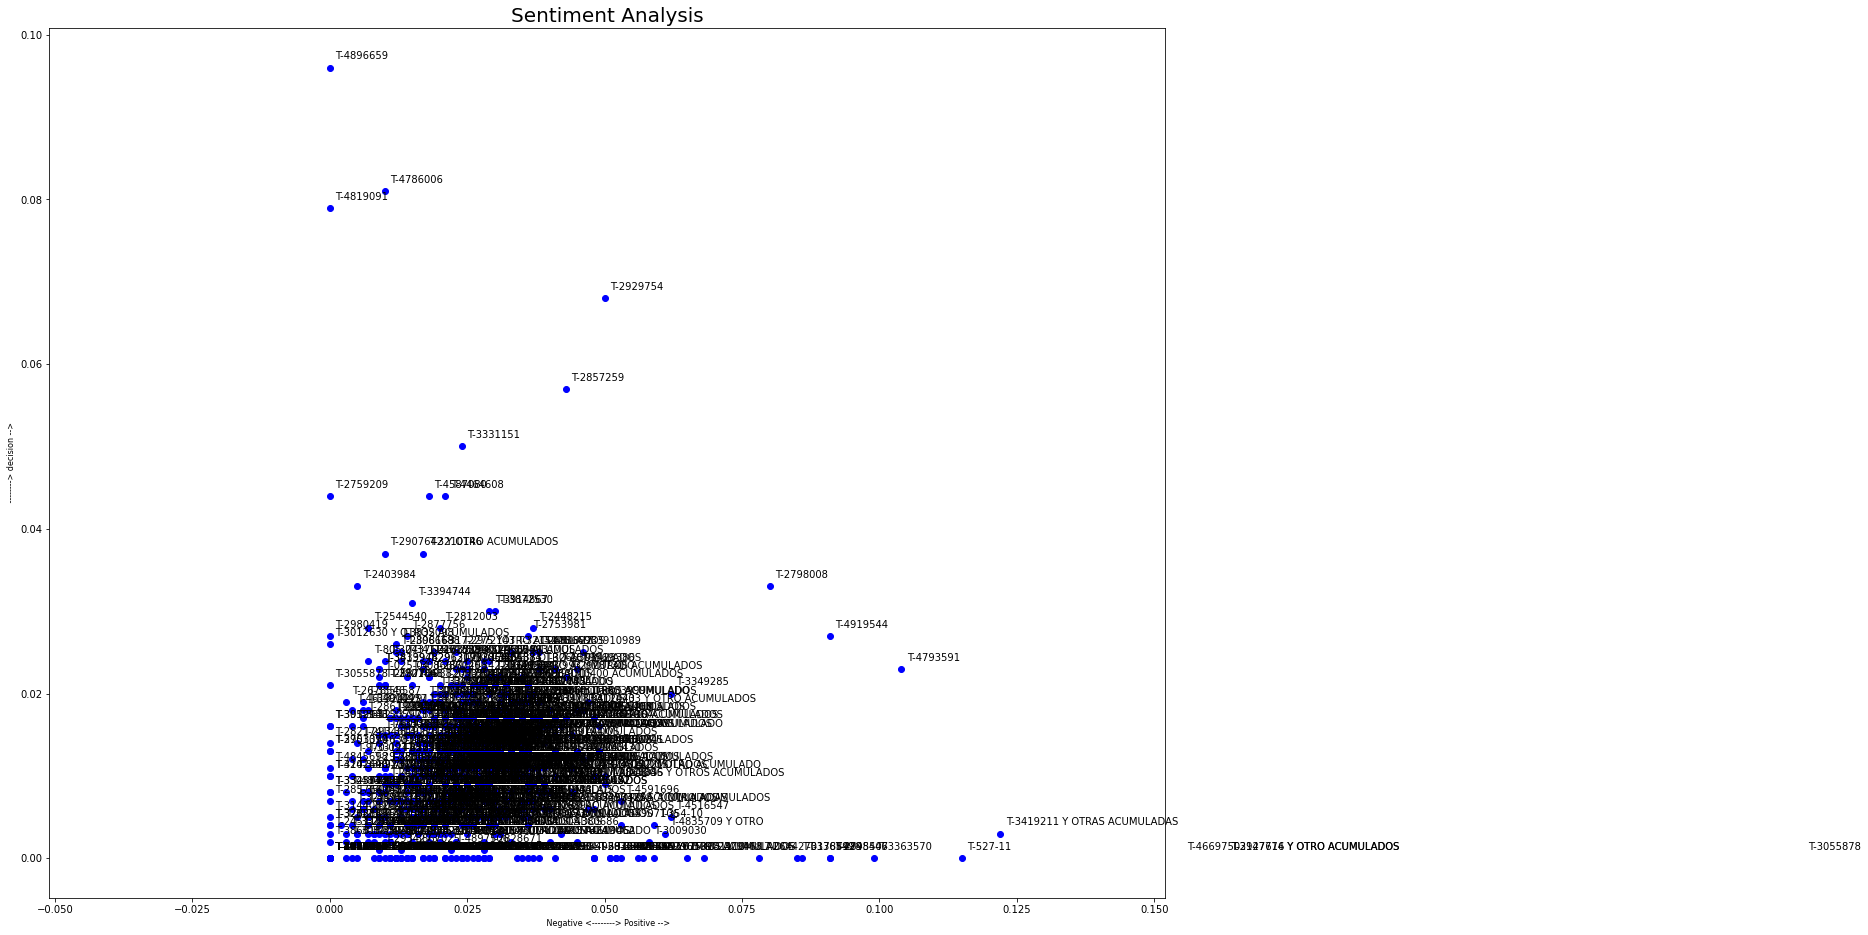

In [88]:
plt.rcParams['figure.figsize'] = [20, 16]

for index, row in enumerate(df_result_sentimientos[1:900].index):
    x = df_result_sentimientos[1:1500].decision_negative.loc[row]
    y = df_result_sentimientos[1:1500].decision_positivo.loc[row]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df_result_sentimientos['file_id'][index], fontsize=10)
    plt.xlim(-0.051, 0.152) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel(' Negative <--------> Positive -->', fontsize=8)
plt.ylabel(' --------> decision -->', fontsize=8)

plt.show()

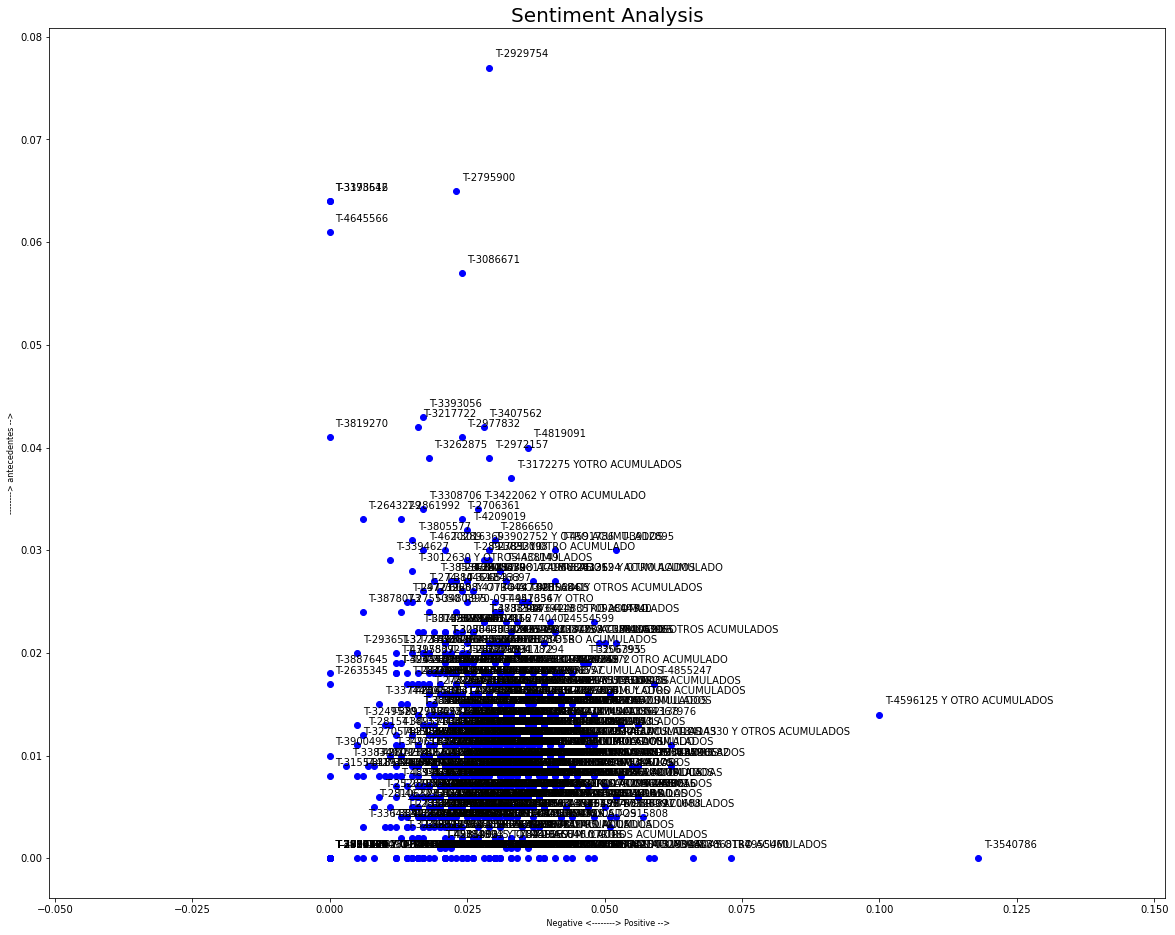

In [89]:
plt.rcParams['figure.figsize'] = [20, 16]

for index, row in enumerate(df_result_sentimientos[1:900].index):
    x = df_result_sentimientos[1:1500].antecedentes_negative.loc[row]
    y = df_result_sentimientos[1:1500].antecedentes_positivo.loc[row]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, df_result_sentimientos['file_id'][index], fontsize=10)
    plt.xlim(-0.051, 0.152) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel(' Negative <--------> Positive -->', fontsize=8)
plt.ylabel('--------> antecedentes -->', fontsize=8)

plt.show()

In [90]:
##new_data.drop(['neg'], axis=1)

In [91]:
ProfileReport(df_result_sentimientos, title="Tutelas Profiling Report")

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [92]:
new_data["decision"][1]

'decision   en merito de lo expuesto la  sala primera de revision de la corte constitucional administrando justicia en  nombre del pueblo y por mandato de la constitucion   resuelve   primero revocar el  fallo proferido por la sala laboral del tribunal superior del distrito judicial  de bogota el 2 de junio de 2010 que confirmo el expedido por el juzgado  veintiocho laboral del circuito de bogota el 21 de abril de 2010 y en su lugar  tutelar los derechos a la salud y a la integridad personal de la senora  maria del carmen zabala lopez   segundo como  consecuencia de lo anterior ordenar a la empresa promotora de salud del  regimen subsidiado convida que en un termino de cuarenta y ocho 48 horas  contadas a partir de la notificacion de la presente sentencia garantice el  acceso de la senora maria del carmen zabala lopez a los servicios de salud  requeridos y le asigne la cita que necesita con el medico oftalmologo  tratante para que se la valore y se le prescriban los medicamentos requer

In [93]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oscfrayle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True